<a href="https://colab.research.google.com/github/machiwao/ml-development/blob/main/tutorial_files/fccamp_MAGIC_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Dataset Reference:
UCI Machine Learning Repository. (n.d.). Archive.ics.uci.edu. https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'].value_counts()

class
1    12332
0     6688
Name: count, dtype: int64

In [ ]:
 # Convert class labels from strings to 0 for 'g' and 1 for 'h'
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

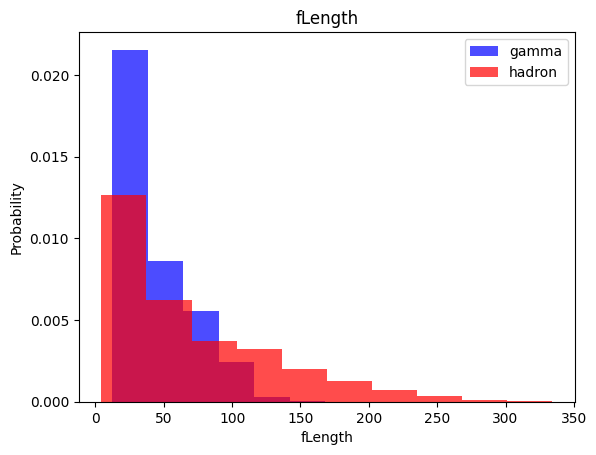

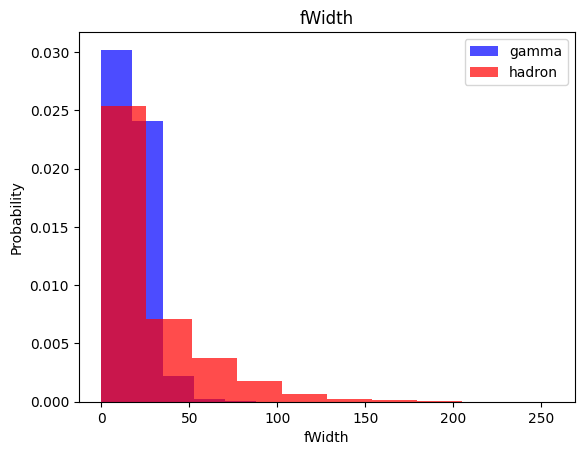

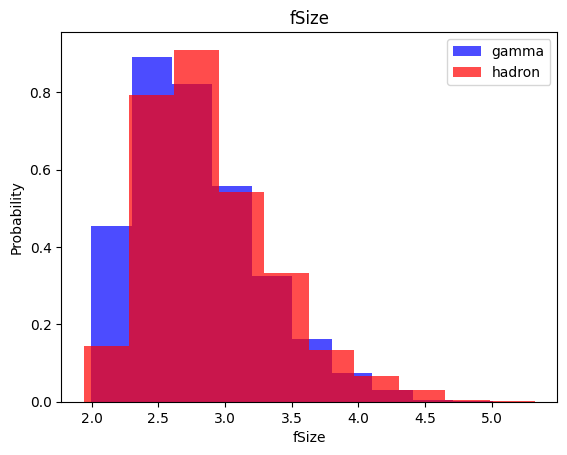

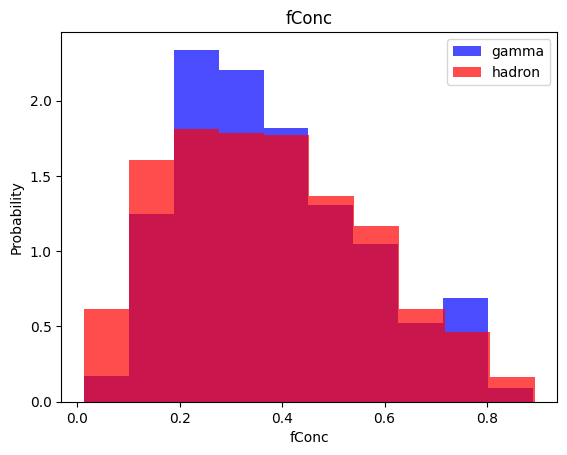

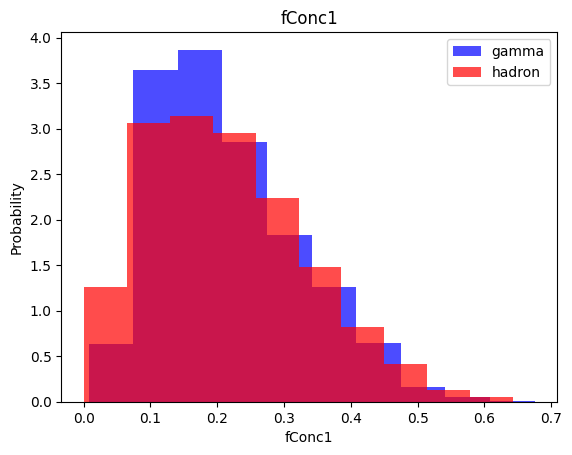

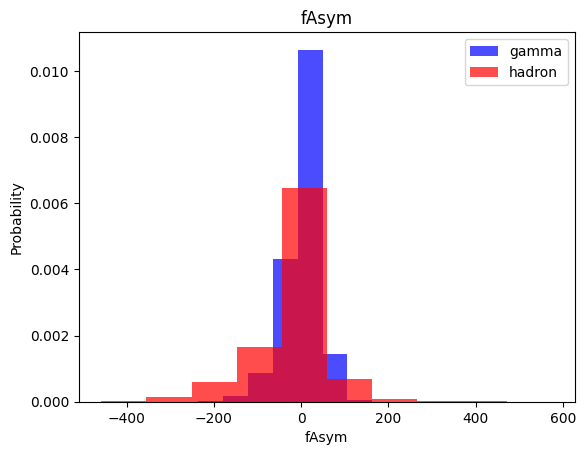

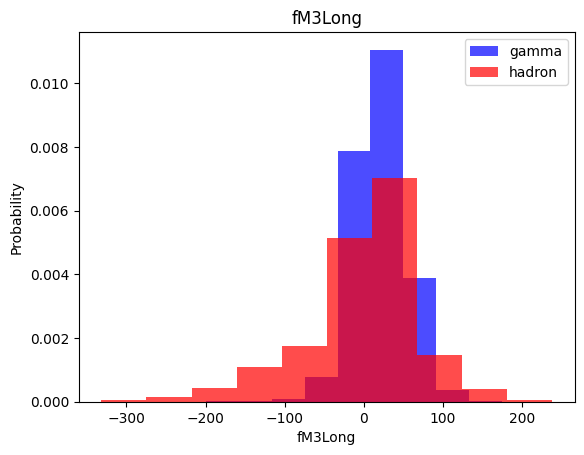

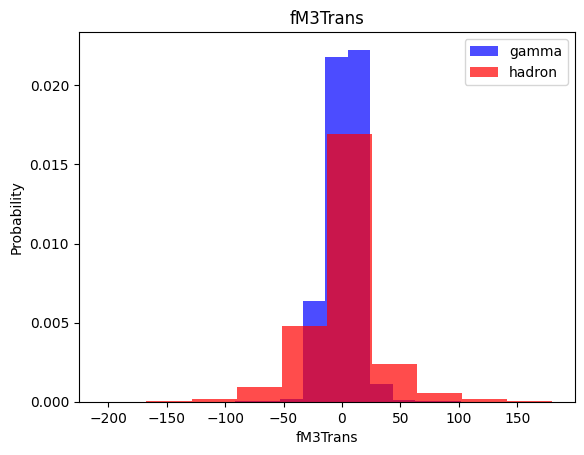

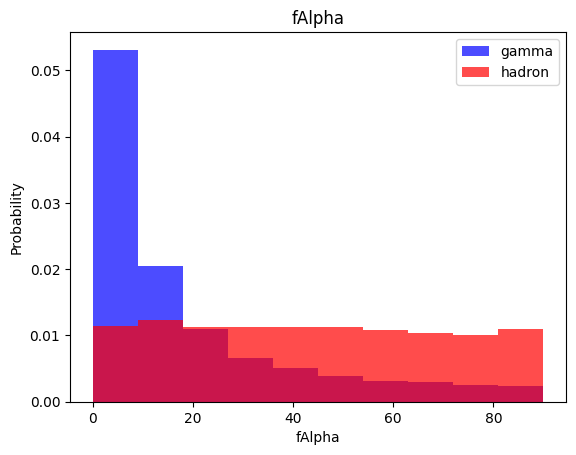

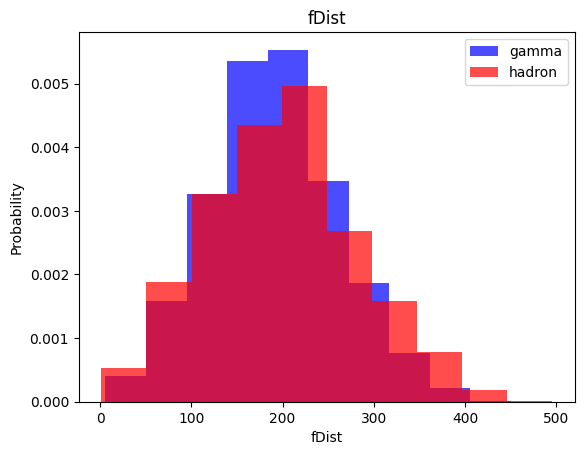

In [ ]:
# Plot histograms to check defining features for gamma and hadron
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = "blue", label = 'gamma', alpha = 0.7, density =True)
  plt.hist(df[df["class"] == 0][label], color = "red", label = 'hadron', alpha = 0.7, density =True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets
Preparing data sets

In [ ]:
train, valid, test = np.split(df.sample(frac = 1), (int(0.6 * len(df)), int(0.8 * len(df))))

In [ ]:
print(f"Number of Training Gamma: {len(train[train['class'] == 1])}")
print(f"Number of Training Hadrons: {len(train[train['class'] == 0])}")

Number of Training Gamma: 7381
Number of Training Hadrons: 4031


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values # Drop Class values
  y = dataframe[dataframe.columns[-1]].values # Select Actual Class values

  # Scale values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # Oversample to balance out gamma and hadrons
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  # Create dataframe with scaled values
  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
print(f"Number of Training Gamma (Oversampled): {sum(y_train == 1)}")
print(f"Number of Training Hadrons (Oversampled): {sum(y_train == 0)}")

Number of Training Gamma (Oversampled): 7381
Number of Training Hadrons (Oversampled): 7381


#k-Nearest Neighbors
Implementation of k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
score = []
k_range = list(range(1, 101))
best_k = 0;
best_score = float('-inf')

for k in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train, y_train) # Train Model

  y_pred = knn_model.predict(x_test) # Predict labels for test set
  if knn_model.score(x_test, y_test) > best_score:
    best_score = knn_model.score(x_test, y_test)
    best_k = k
    print(f"Best model - k = {k}, Accuracy: {best_score}")

  score.append(knn_model.score(x_test, y_test))

Best model - k = 1, Accuracy: 0.7996845425867508
Best model - k = 3, Accuracy: 0.8038906414300736
Best model - k = 5, Accuracy: 0.8080967402733964
Best model - k = 7, Accuracy: 0.812565720294427
Best model - k = 9, Accuracy: 0.823080967402734
Best model - k = 11, Accuracy: 0.8275499474237644
Best model - k = 13, Accuracy: 0.8299158780231335
Best model - k = 29, Accuracy: 0.831230283911672
Best model - k = 33, Accuracy: 0.8314931650893796
Best model - k = 35, Accuracy: 0.8341219768664564
Best model - k = 37, Accuracy: 0.8346477392218717
Best model - k = 39, Accuracy: 0.8359621451104101
Best model - k = 57, Accuracy: 0.8362250262881178


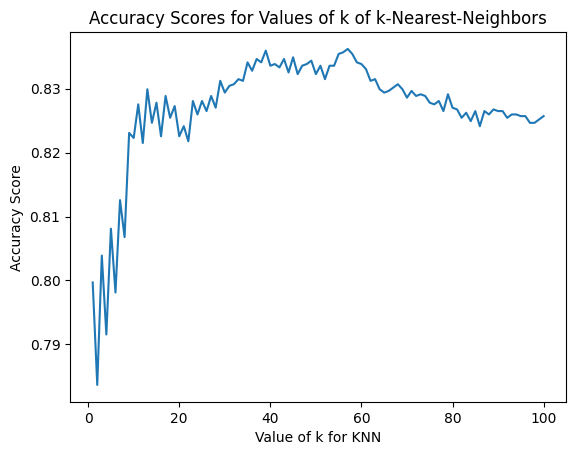

In [ ]:
plt.plot(range(1,101), score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = best_k)

In [ ]:
knn_model.fit(x_train, y_train) # Train Model
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1360
           1       0.85      0.91      0.88      2444

    accuracy                           0.84      3804
   macro avg       0.83      0.81      0.82      3804
weighted avg       0.83      0.84      0.83      3804



- We get an 84% accuracy by checking 57 points close to the new data compared to the 81% accuracy by checking 5 points
- Precision = how many of the labeled items are truely hadron/gamma
- Recall = how many of the truely hadron/gamma did the model get right

#kNN Optimization using Different Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
# Parameter Grid for GridSearch
param_grid = {
    'knn__n_neighbors': [33, 35, 37, 39, 57],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [33, 35, 37, 39, 57],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 33, 'knn__weights': 'distance'}
Best cross-validation score: 0.921694326746857


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 33, weights = 'distance', metric = 'manhattan')

In [ ]:
knn_model.fit(x_train, y_train) # Train Model
y_pred = knn_model.predict(x_test)

In [ ]:
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print(best_model)
print(f"Test Accuracy: {test_score}")

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=33,
                                      weights='distance'))])
Test Accuracy: 0.8409568874868559


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1360
           1       0.85      0.92      0.88      2444

    accuracy                           0.84      3804
   macro avg       0.84      0.81      0.82      3804
weighted avg       0.84      0.84      0.84      3804



#Naive Bayes

Bayes' Rule : P(A|B) = (P(B|A) . P(A))/P(B)

For Example: <br>
P(false '+') = 0.05
P(false '-') = 0.01
P(disease) = 0.1

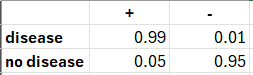

P(disease | + test) = ?
= P('+' | disease) . P(disease) / P(+) <br>
= 0.99 . 0.1 / (0.99 . 0.1) + (0.05 . 0.9)<br>
= 0.099 / (0.099 + 0.045)<br>
= 0.099 / 0.144<br>
= 0.6875 or 68.75%<br>

Naive Bayes' Formula<br>
P(C_k | x) = P(x | C_k) . P(C_k) / P(x)

where: <br>
P(C_k | x) = posterior "how often the class appears given a set of features"

x = feature vector

P(x | C_k) = likelihood "how often the classes are under that category"

P(C_k) = prior "how often the class appears"

P(x) = evidence

Formula is proportional to the following:

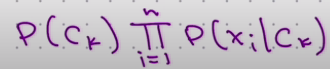


Predicted y:
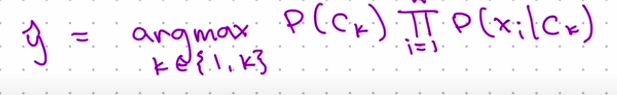


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1312
           1       0.75      0.90      0.81      2492

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



- Naive Bayes' Prediction (0.72) is worse than k-Nearest Neighbors (k = 5, 0.81)

#Logistic Regression
How can we model probability?

P = 1/ 1 + e^-(mx + b)

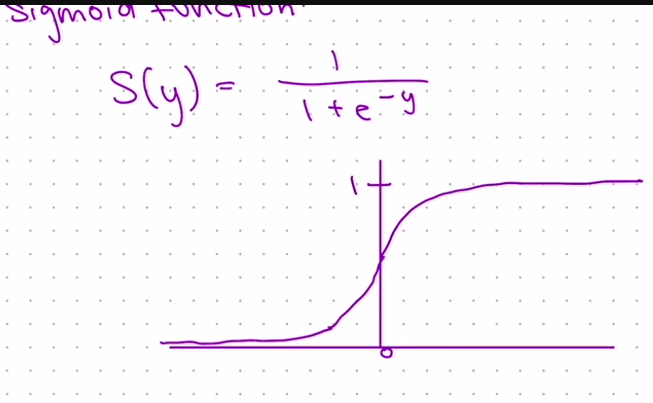

x_0 = simple logistical regression

x_0, x_1, x_2 ... x_n = multiple logistical regression





In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1312
           1       0.86      0.83      0.84      2492

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



-Multiple Logistical Regression (0.78) is slightly better than Naive Bayes (0.72) but slightly worse than k-Nearest Neighbors (k = 5, 0.81)

#Support Vector Machines (SVM)

Separate and classify data values using specified boundaries and margins (support vectors)
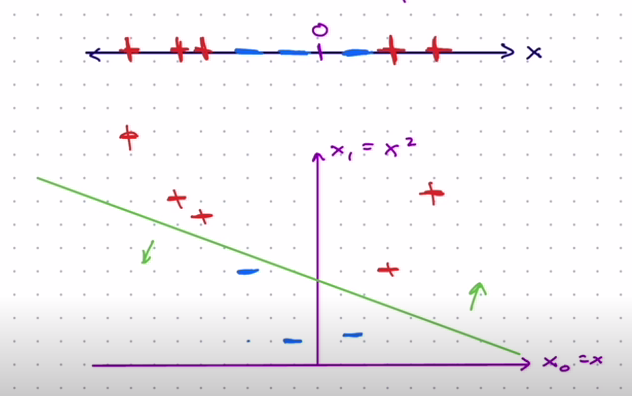

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1312
           1       0.89      0.90      0.90      2492

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Out of all classification models, SVM returned the most accurate "base" accuracy with 0.86

#Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

  history = nn_model.fit(
    x_train, y_train,
    epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
  )

  return nn_model, history

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

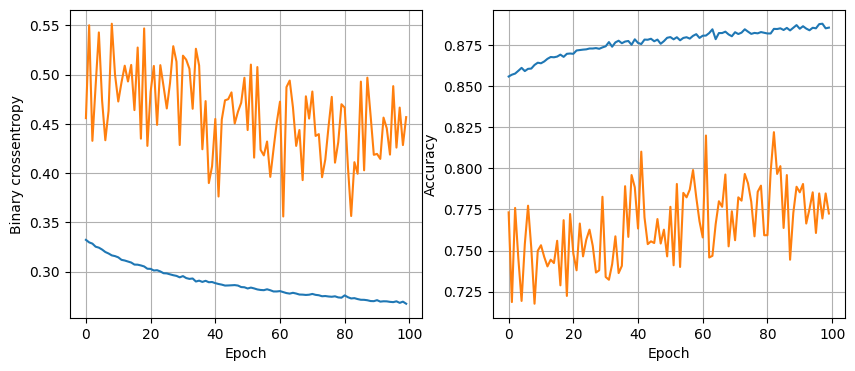

In [ ]:
plot_history(history)

16 nodes, dropout 0, lr 0.01, batchsize 32


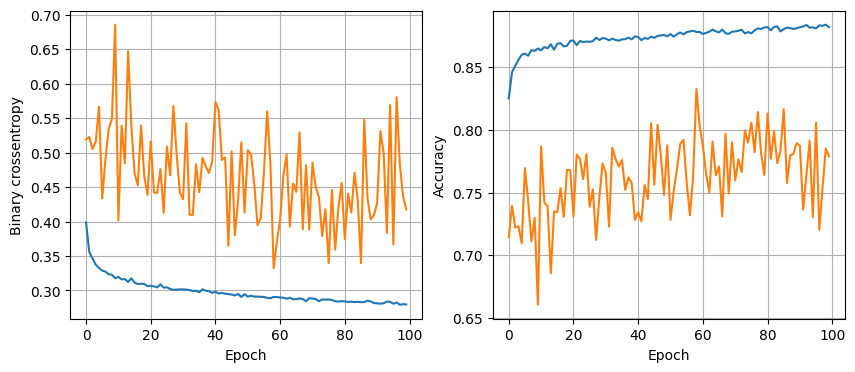

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8770
16 nodes, dropout 0, lr 0.01, batchsize 64


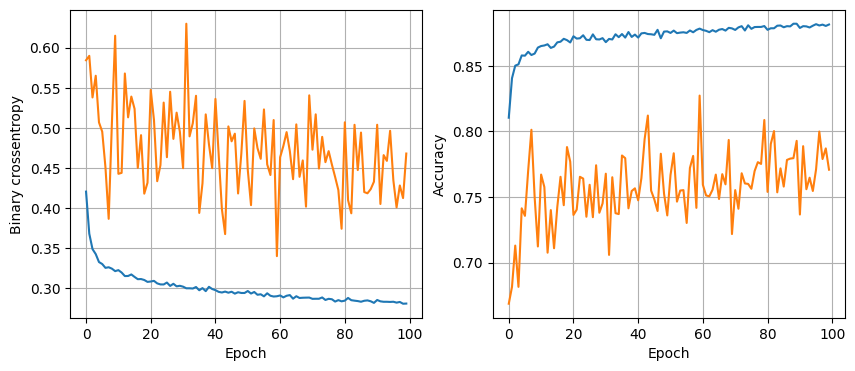

119/119 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.8793
16 nodes, dropout 0, lr 0.01, batchsize 128


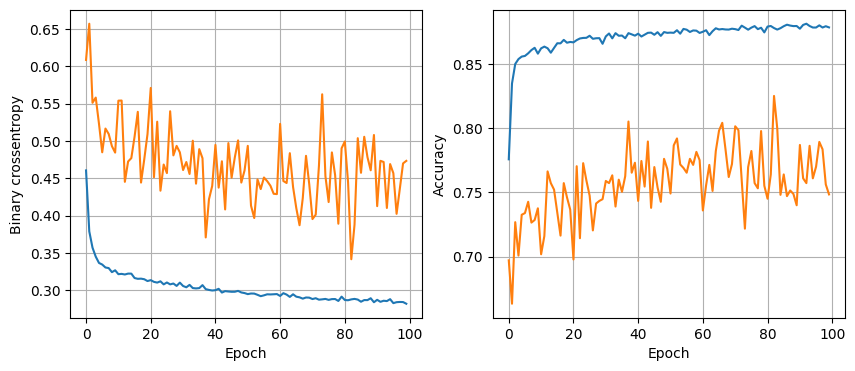

119/119 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.8788
16 nodes, dropout 0, lr 0.005, batchsize 32


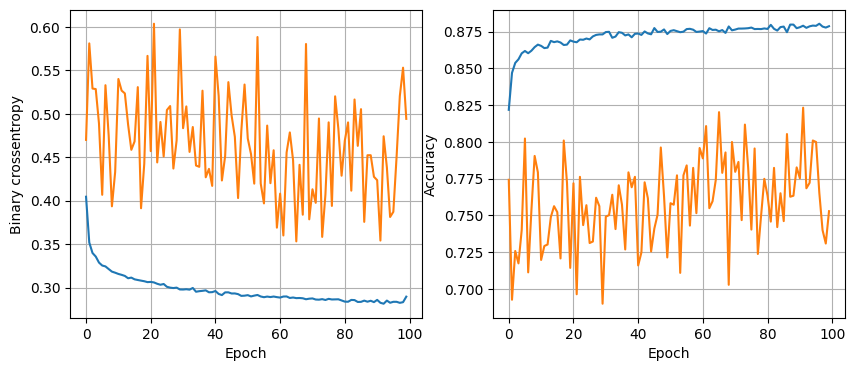

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8778
16 nodes, dropout 0, lr 0.005, batchsize 64


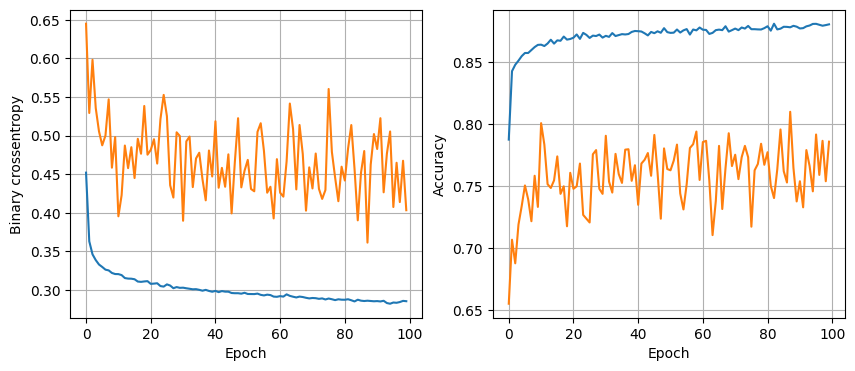

119/119 [==============================] - 1s 4ms/step - loss: 0.3071 - accuracy: 0.8791
16 nodes, dropout 0, lr 0.005, batchsize 128


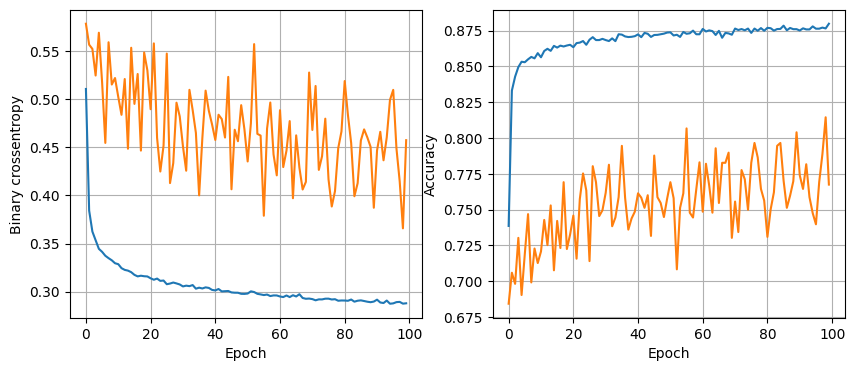

119/119 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.8812
16 nodes, dropout 0, lr 0.001, batchsize 32


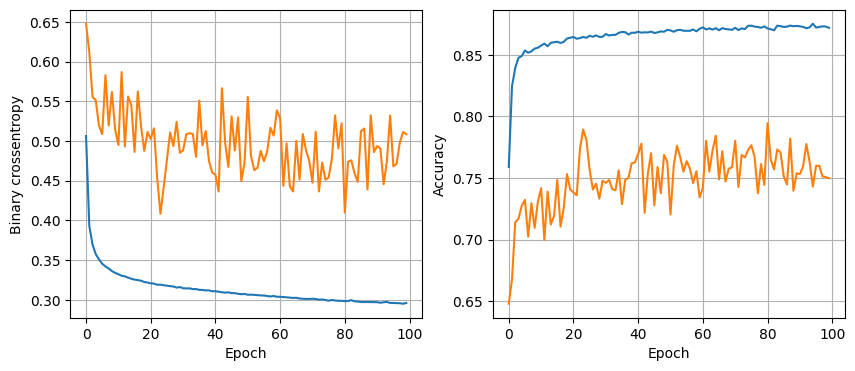

119/119 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.8807
16 nodes, dropout 0, lr 0.001, batchsize 64


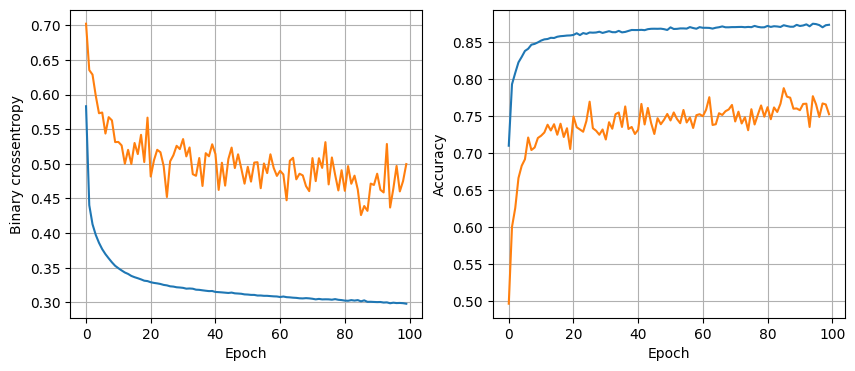

119/119 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8822
16 nodes, dropout 0, lr 0.001, batchsize 128


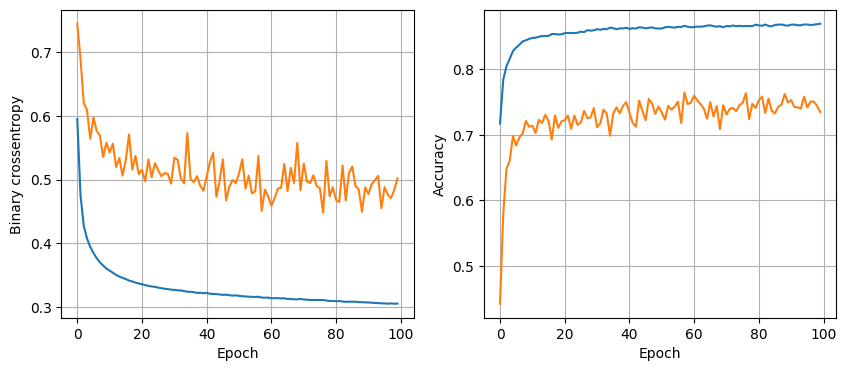

119/119 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.8809
16 nodes, dropout 0.2, lr 0.01, batchsize 32


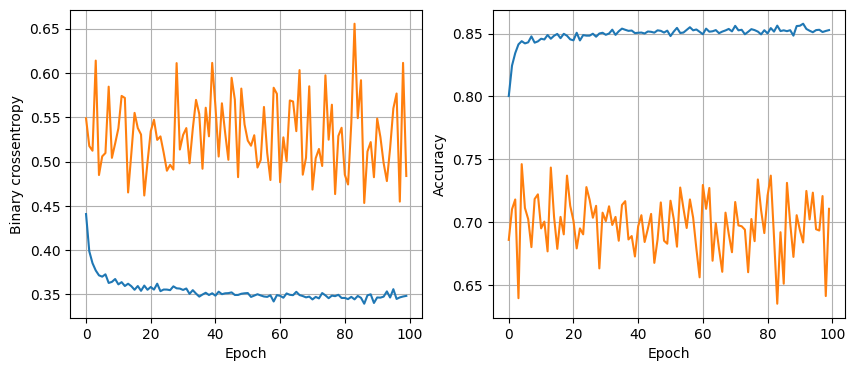

119/119 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8741
16 nodes, dropout 0.2, lr 0.01, batchsize 64


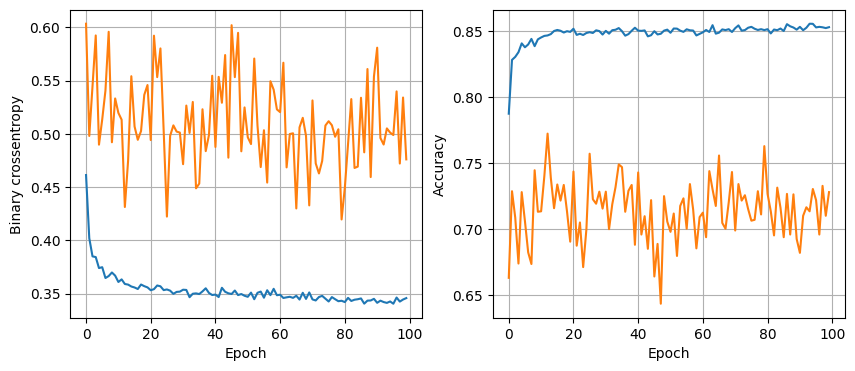

119/119 [==============================] - 1s 4ms/step - loss: 0.3059 - accuracy: 0.8793
16 nodes, dropout 0.2, lr 0.01, batchsize 128


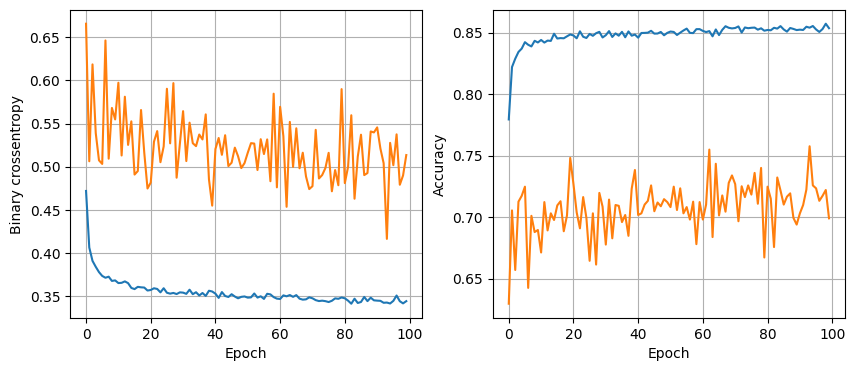

119/119 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8741
16 nodes, dropout 0.2, lr 0.005, batchsize 32


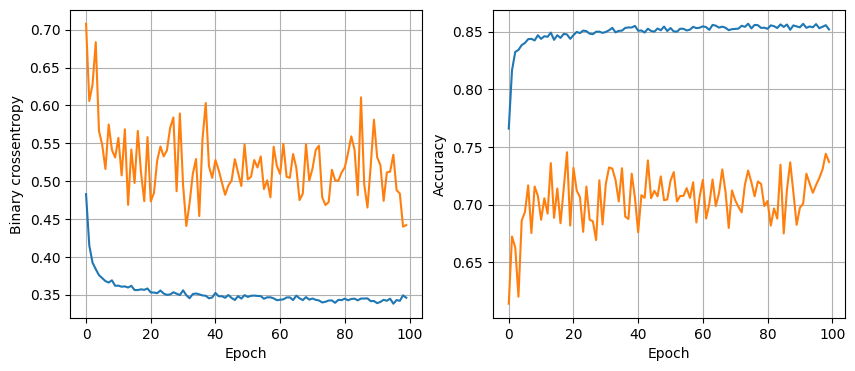

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8791
16 nodes, dropout 0.2, lr 0.005, batchsize 64


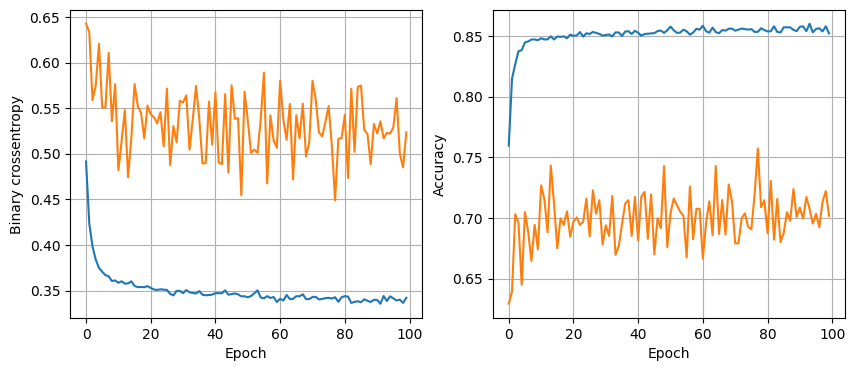

119/119 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.8751
16 nodes, dropout 0.2, lr 0.005, batchsize 128


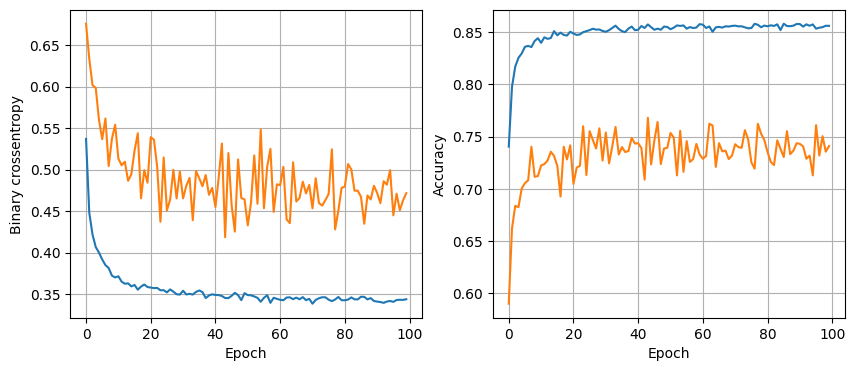

119/119 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8793
16 nodes, dropout 0.2, lr 0.001, batchsize 32


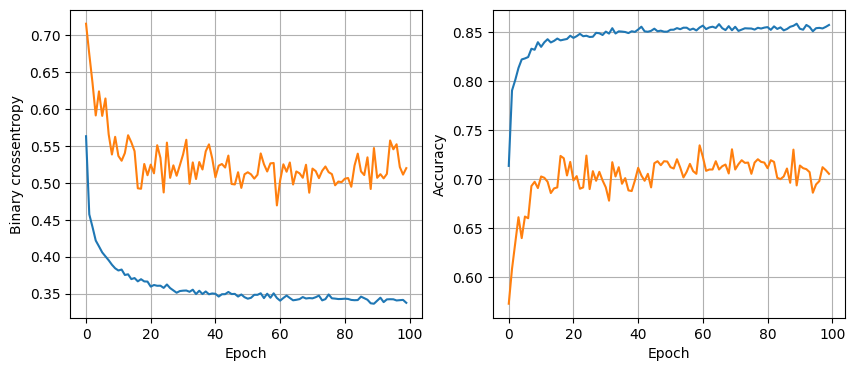

119/119 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8751
16 nodes, dropout 0.2, lr 0.001, batchsize 64


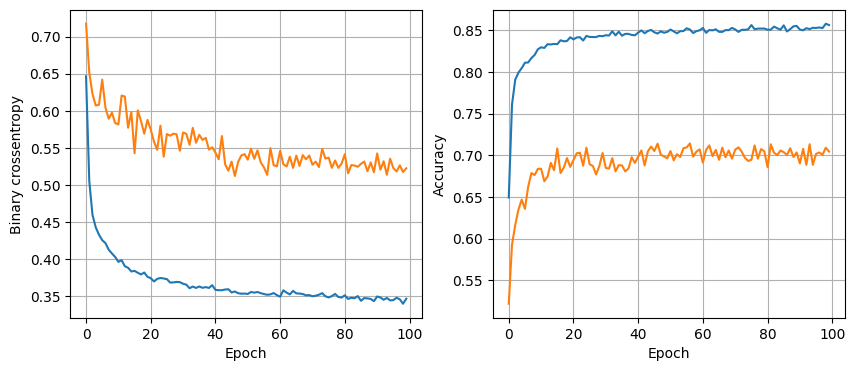

119/119 [==============================] - 1s 4ms/step - loss: 0.3095 - accuracy: 0.8775
16 nodes, dropout 0.2, lr 0.001, batchsize 128


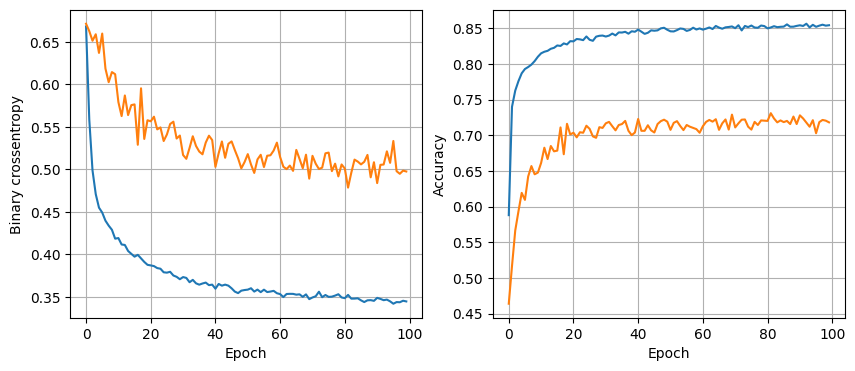

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8751
32 nodes, dropout 0, lr 0.01, batchsize 32


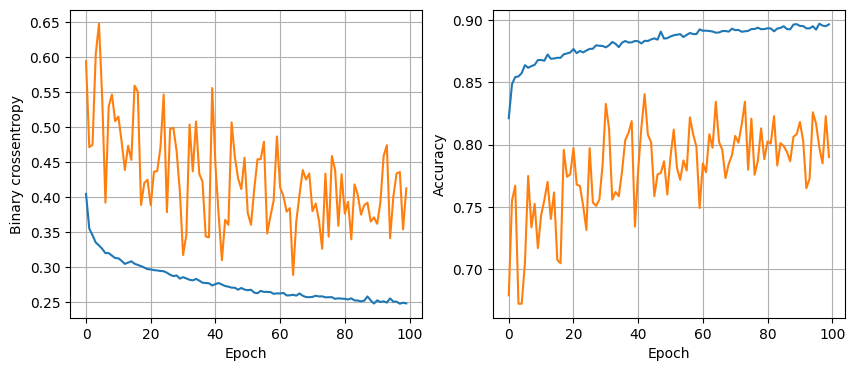

119/119 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8804
32 nodes, dropout 0, lr 0.01, batchsize 64


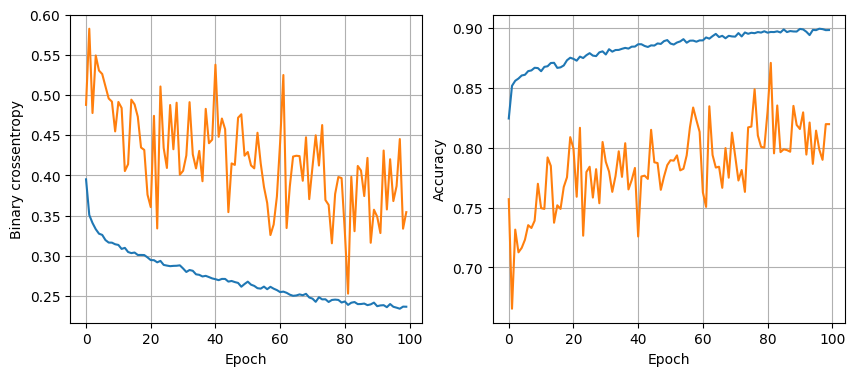

119/119 [==============================] - 1s 4ms/step - loss: 0.3444 - accuracy: 0.8733
32 nodes, dropout 0, lr 0.01, batchsize 128


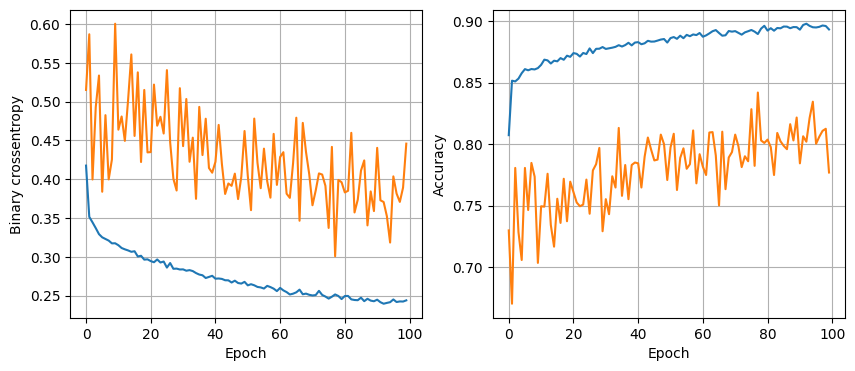

119/119 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.005, batchsize 32


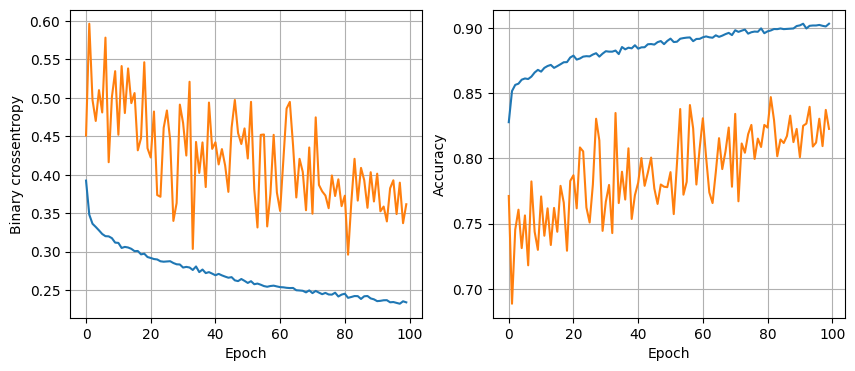

119/119 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.005, batchsize 64


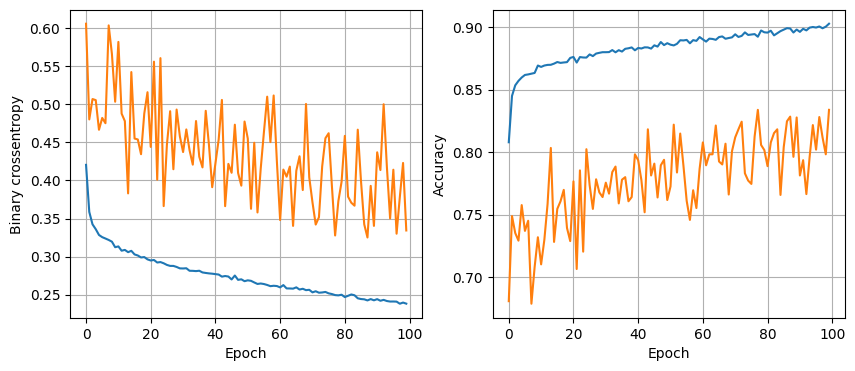

119/119 [==============================] - 1s 4ms/step - loss: 0.3327 - accuracy: 0.8738
32 nodes, dropout 0, lr 0.005, batchsize 128


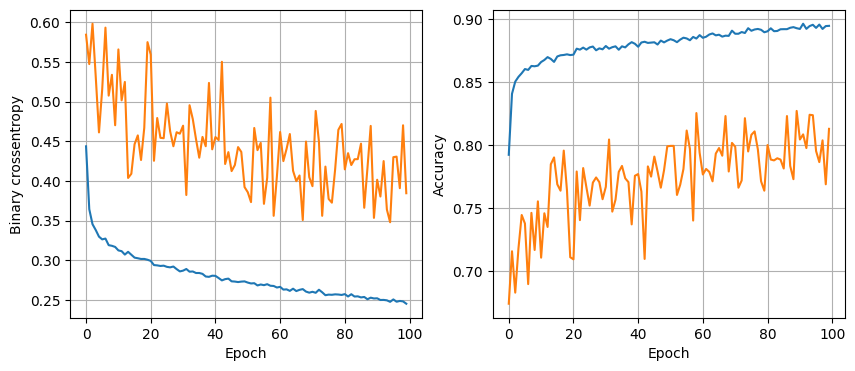

119/119 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8759
32 nodes, dropout 0, lr 0.001, batchsize 32


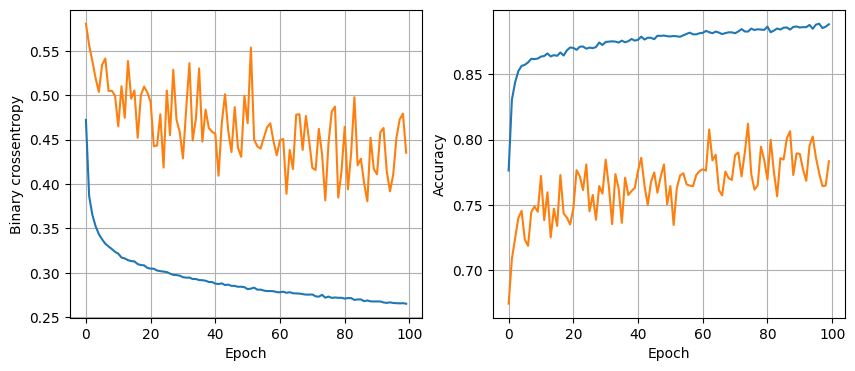

119/119 [==============================] - 0s 4ms/step - loss: 0.3003 - accuracy: 0.8817
32 nodes, dropout 0, lr 0.001, batchsize 64


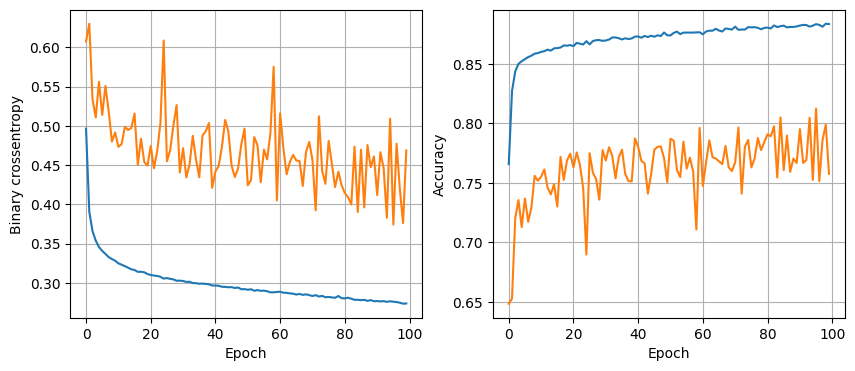

119/119 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8783
32 nodes, dropout 0, lr 0.001, batchsize 128


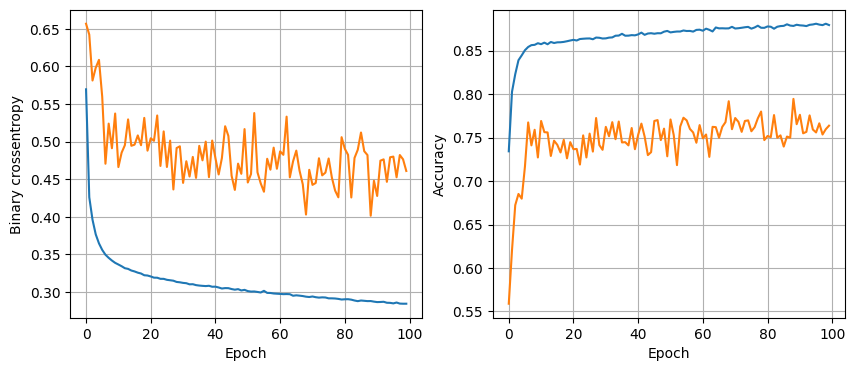

119/119 [==============================] - 1s 4ms/step - loss: 0.2968 - accuracy: 0.8817
32 nodes, dropout 0.2, lr 0.01, batchsize 32


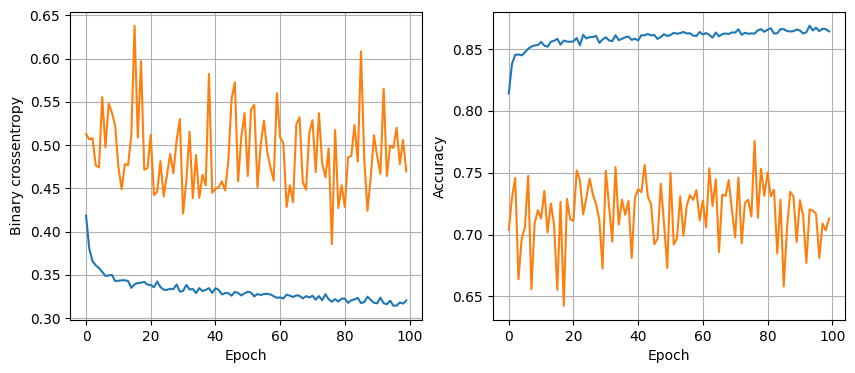

119/119 [==============================] - 1s 4ms/step - loss: 0.3026 - accuracy: 0.8764
32 nodes, dropout 0.2, lr 0.01, batchsize 64


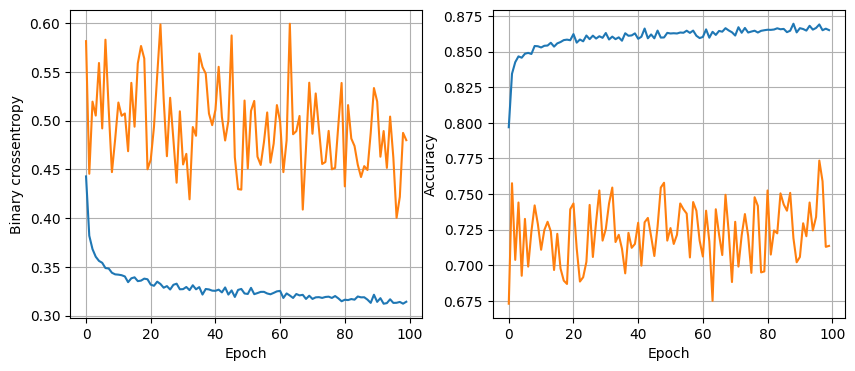

119/119 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.01, batchsize 128


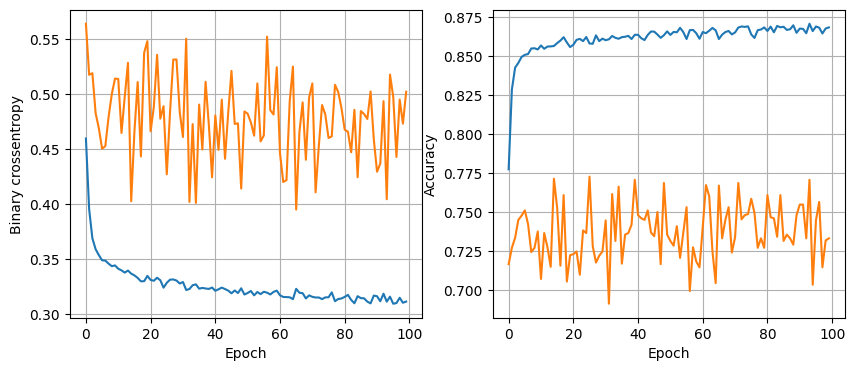

119/119 [==============================] - 1s 4ms/step - loss: 0.3015 - accuracy: 0.8812
32 nodes, dropout 0.2, lr 0.005, batchsize 32


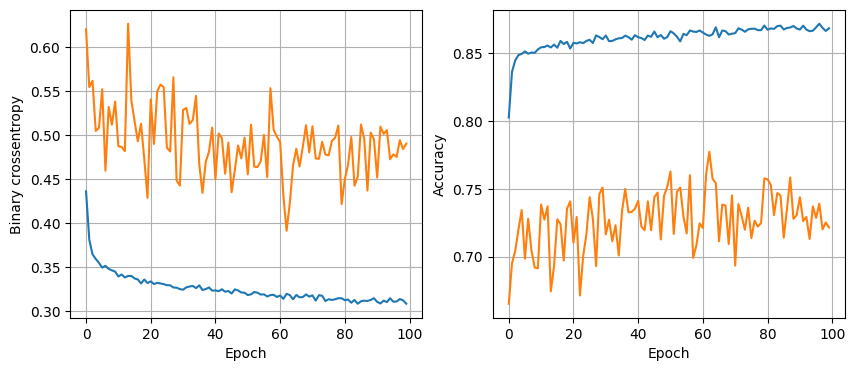

119/119 [==============================] - 1s 4ms/step - loss: 0.2962 - accuracy: 0.8778
32 nodes, dropout 0.2, lr 0.005, batchsize 64


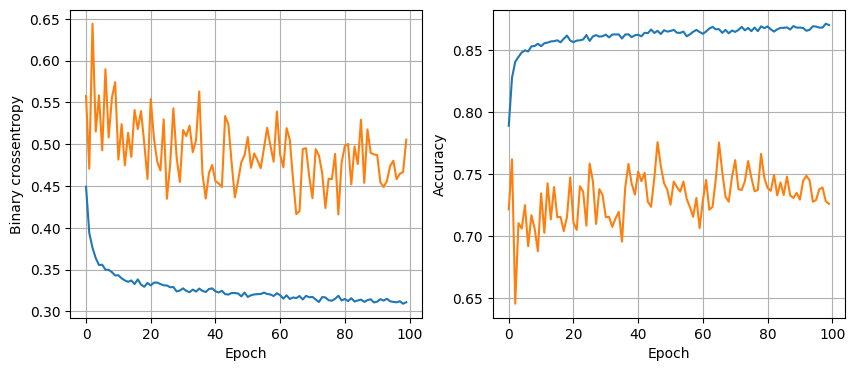

119/119 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8783
32 nodes, dropout 0.2, lr 0.005, batchsize 128


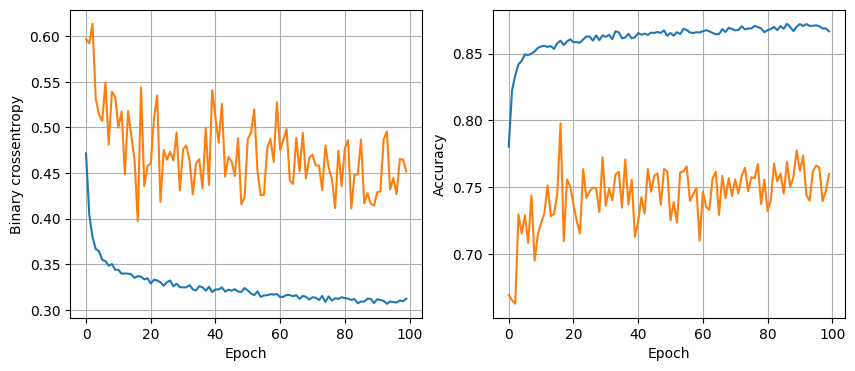

119/119 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8864
32 nodes, dropout 0.2, lr 0.001, batchsize 32


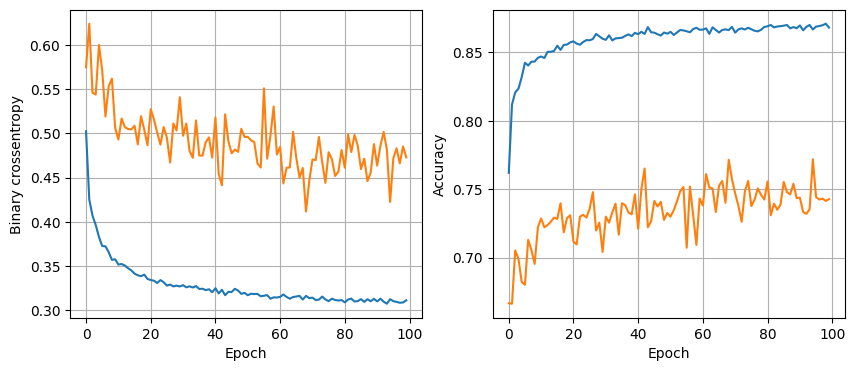

119/119 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.8799
32 nodes, dropout 0.2, lr 0.001, batchsize 64


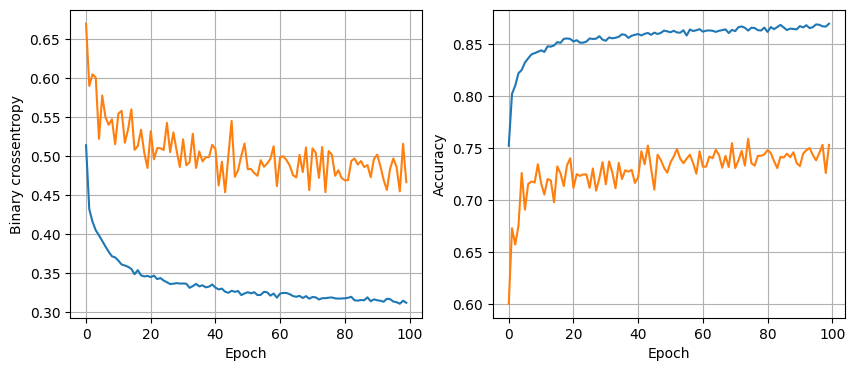

119/119 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.8825
32 nodes, dropout 0.2, lr 0.001, batchsize 128


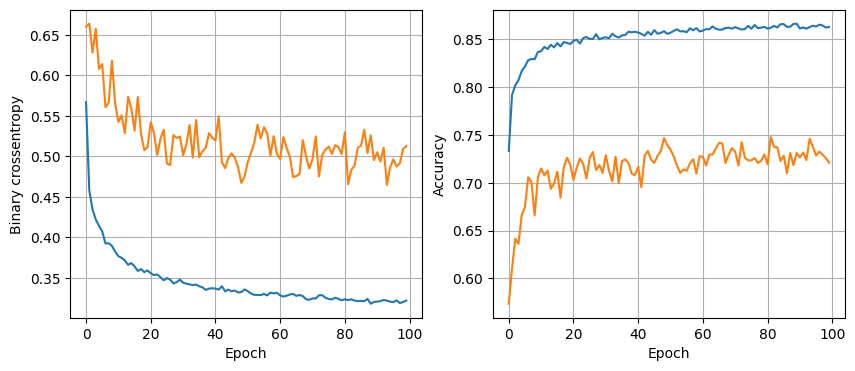

119/119 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8764
64 nodes, dropout 0, lr 0.01, batchsize 32


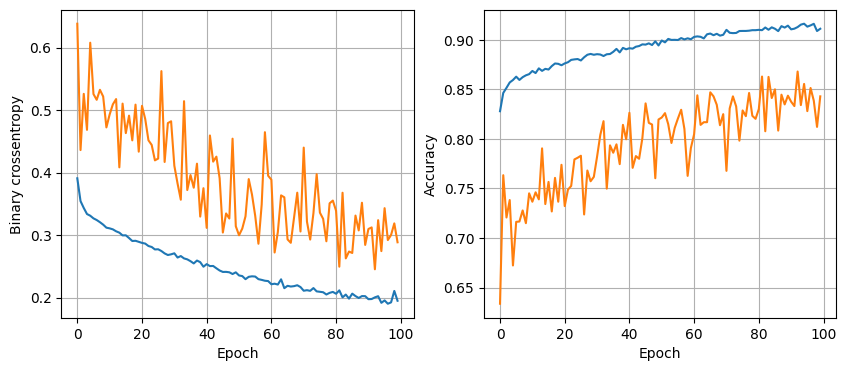

119/119 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.8680
64 nodes, dropout 0, lr 0.01, batchsize 64


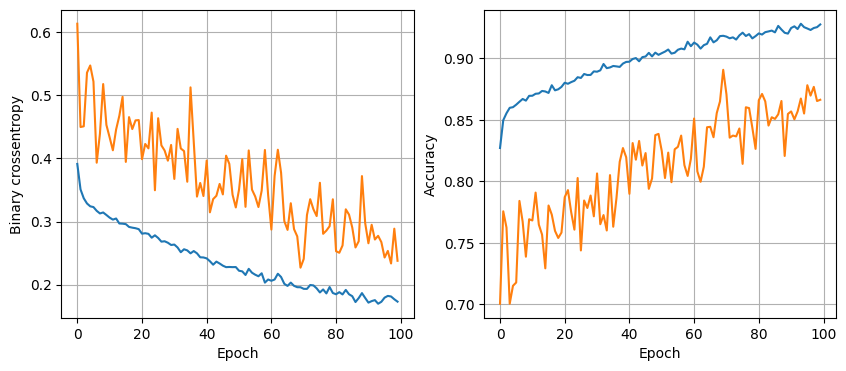

119/119 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.8575
64 nodes, dropout 0, lr 0.01, batchsize 128


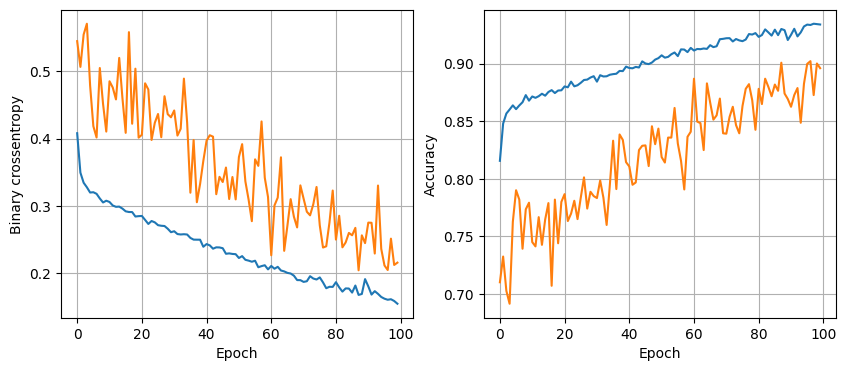

119/119 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.8659
64 nodes, dropout 0, lr 0.005, batchsize 32


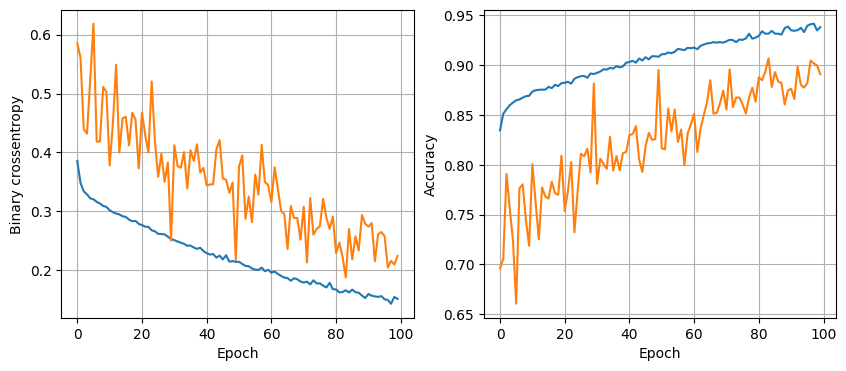

119/119 [==============================] - 0s 4ms/step - loss: 0.5548 - accuracy: 0.8530
64 nodes, dropout 0, lr 0.005, batchsize 64


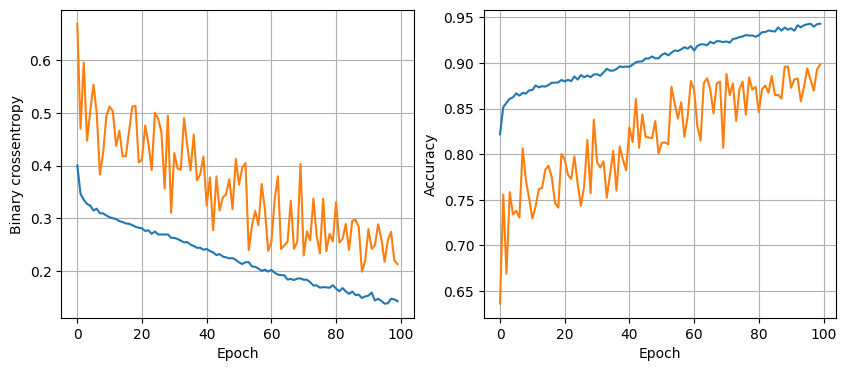

119/119 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.8454
64 nodes, dropout 0, lr 0.005, batchsize 128


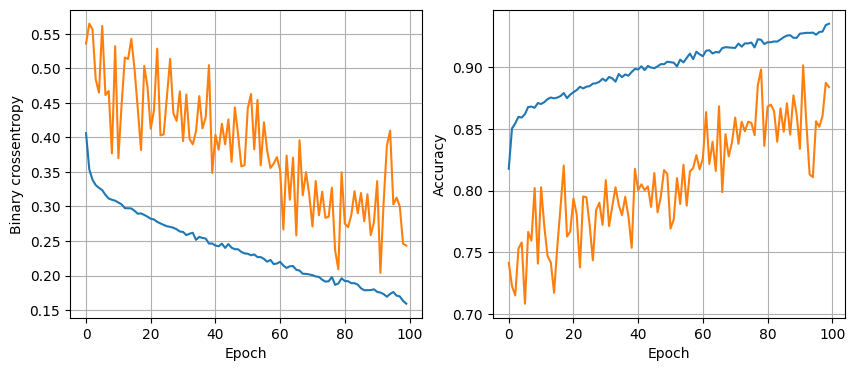

119/119 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8644
64 nodes, dropout 0, lr 0.001, batchsize 32


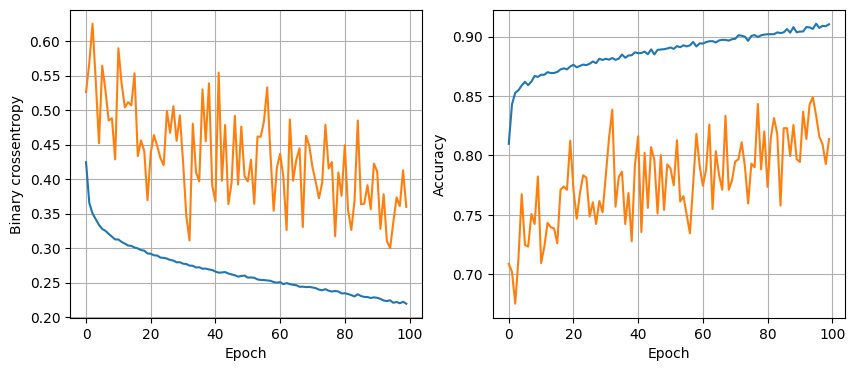

119/119 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8717
64 nodes, dropout 0, lr 0.001, batchsize 64


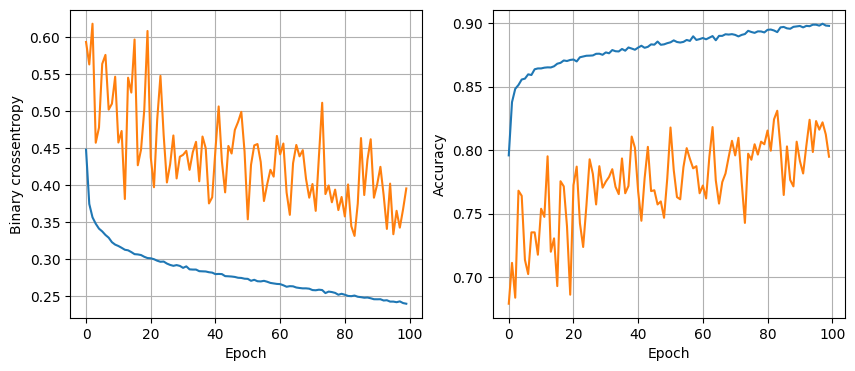

119/119 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8770
64 nodes, dropout 0, lr 0.001, batchsize 128


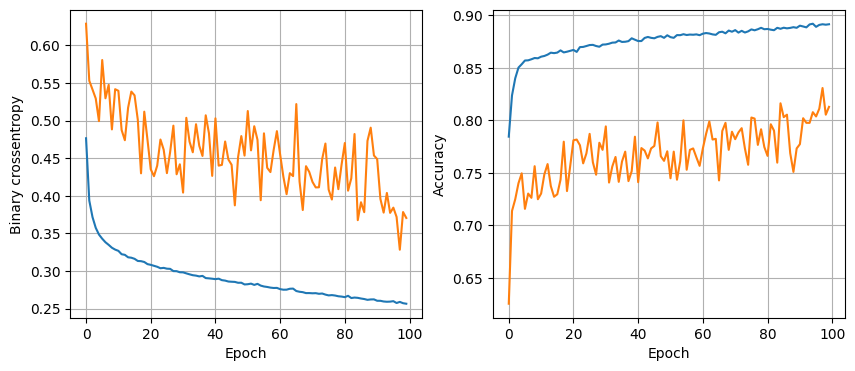

119/119 [==============================] - 0s 3ms/step - loss: 0.3107 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.01, batchsize 32


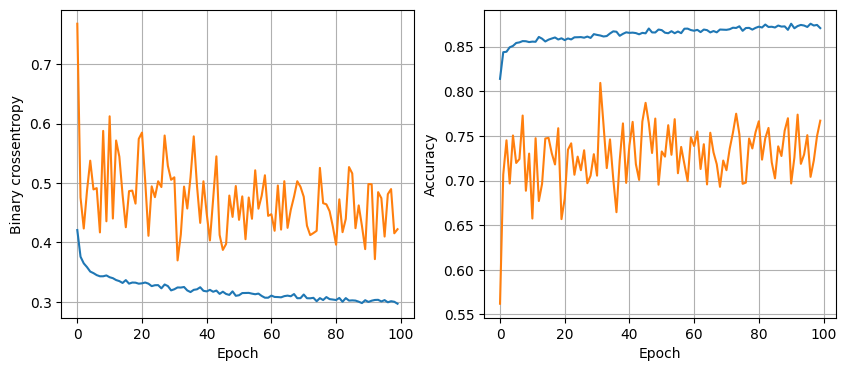

119/119 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.01, batchsize 64


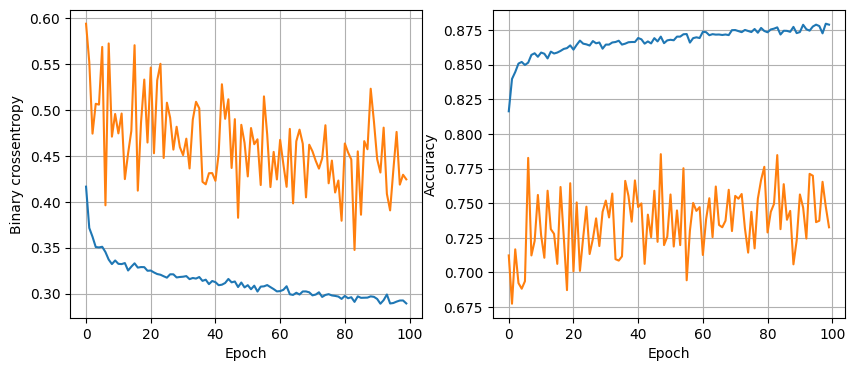

119/119 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.8820
64 nodes, dropout 0.2, lr 0.01, batchsize 128


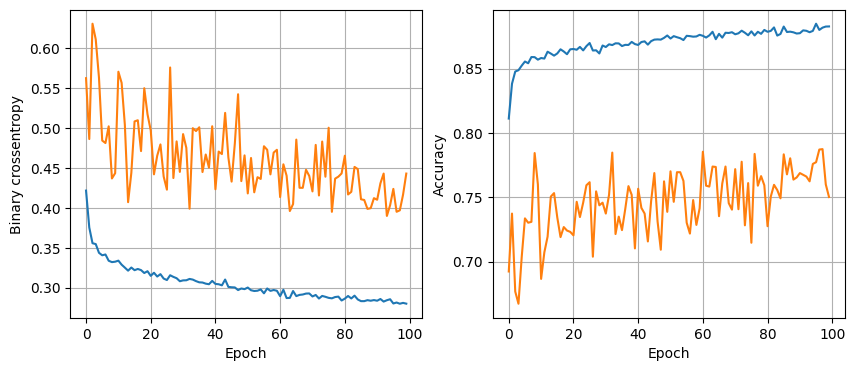

119/119 [==============================] - 1s 4ms/step - loss: 0.2916 - accuracy: 0.8841
64 nodes, dropout 0.2, lr 0.005, batchsize 32


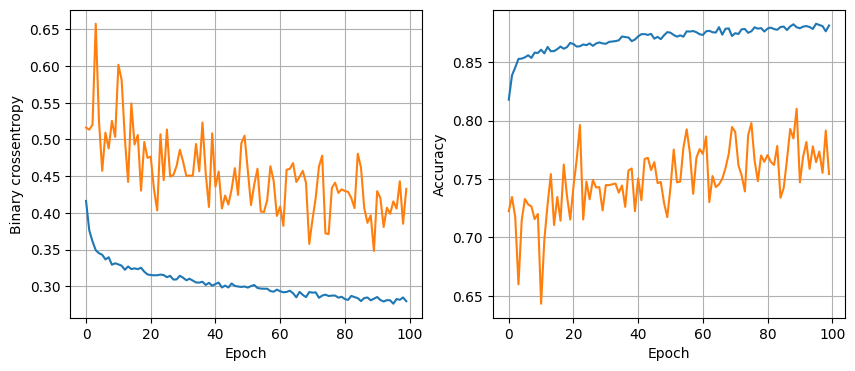

119/119 [==============================] - 1s 4ms/step - loss: 0.2965 - accuracy: 0.8846
64 nodes, dropout 0.2, lr 0.005, batchsize 64


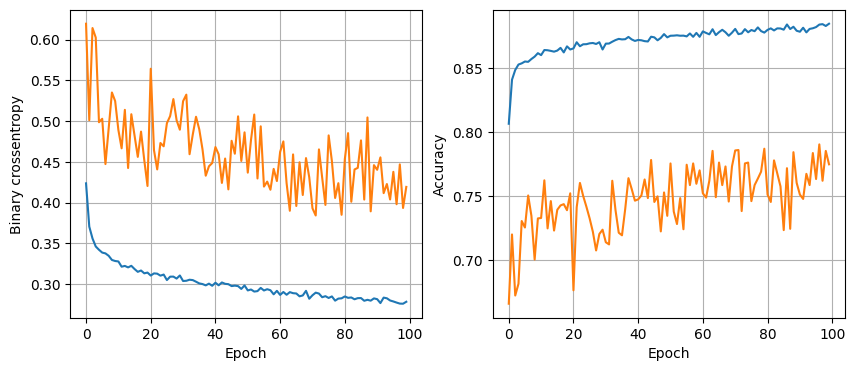

119/119 [==============================] - 0s 3ms/step - loss: 0.2911 - accuracy: 0.8864
64 nodes, dropout 0.2, lr 0.005, batchsize 128


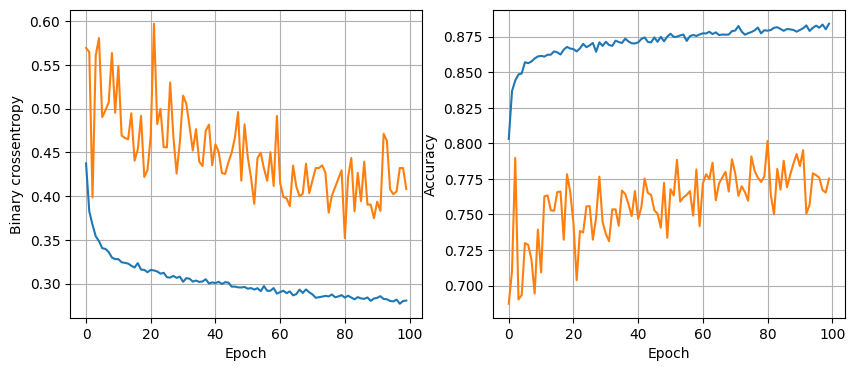

119/119 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8846
64 nodes, dropout 0.2, lr 0.001, batchsize 32


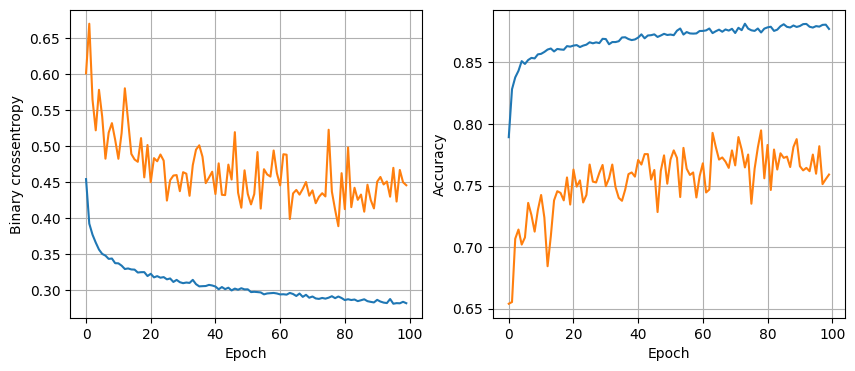

119/119 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.8849
64 nodes, dropout 0.2, lr 0.001, batchsize 64


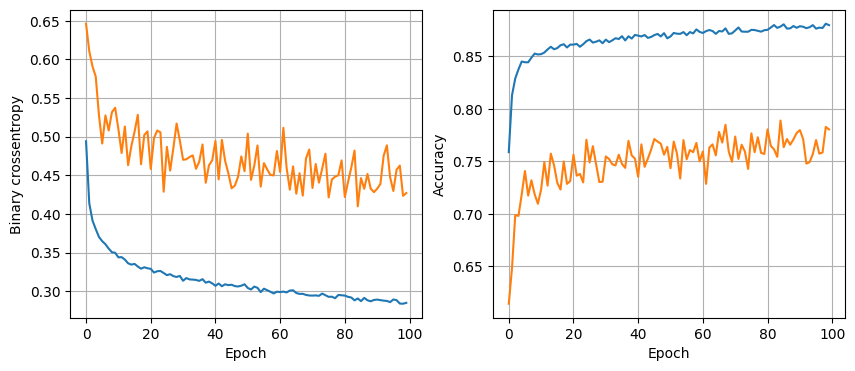

119/119 [==============================] - 1s 4ms/step - loss: 0.2873 - accuracy: 0.8841
64 nodes, dropout 0.2, lr 0.001, batchsize 128


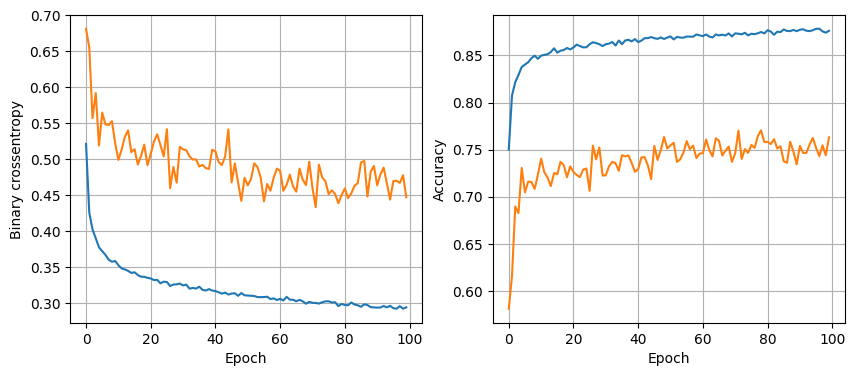

119/119 [==============================] - 0s 4ms/step - loss: 0.2866 - accuracy: 0.8851


In [ ]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batchsize {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1312
           1       0.88      0.95      0.91      2492

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



Neural Network returned 88% accuracy with model specifications : 64 nodes, dropout 0.2, lr 0.001, batchsize 32. Model returned as the least_loss model with 28.42%